# Energy Efficiency

## Links
https://www.kaggle.com/datasets/ujjwalchowdhury/energy-efficiency-data-set/data

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import sympy as sy
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression
from scipy.optimize import root

from scipy.optimize import minimize
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/energy_efficiency_data.csv')

In [3]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
# Observe the data's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


## Check for any missing values in the data

In [5]:
missing_values = df.isnull().sum()
#print(missing_values)

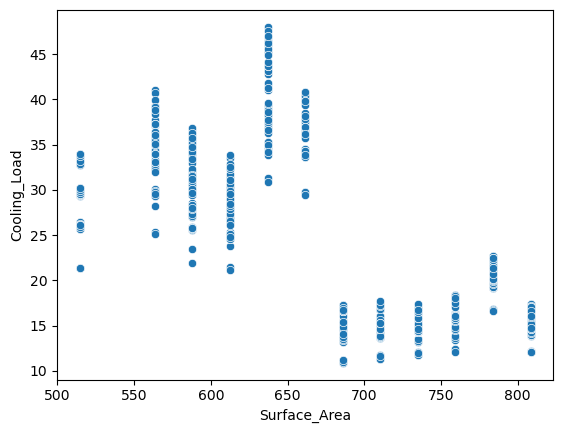

In [6]:
sns.scatterplot(x = df["Surface_Area"], y = df["Cooling_Load"]);

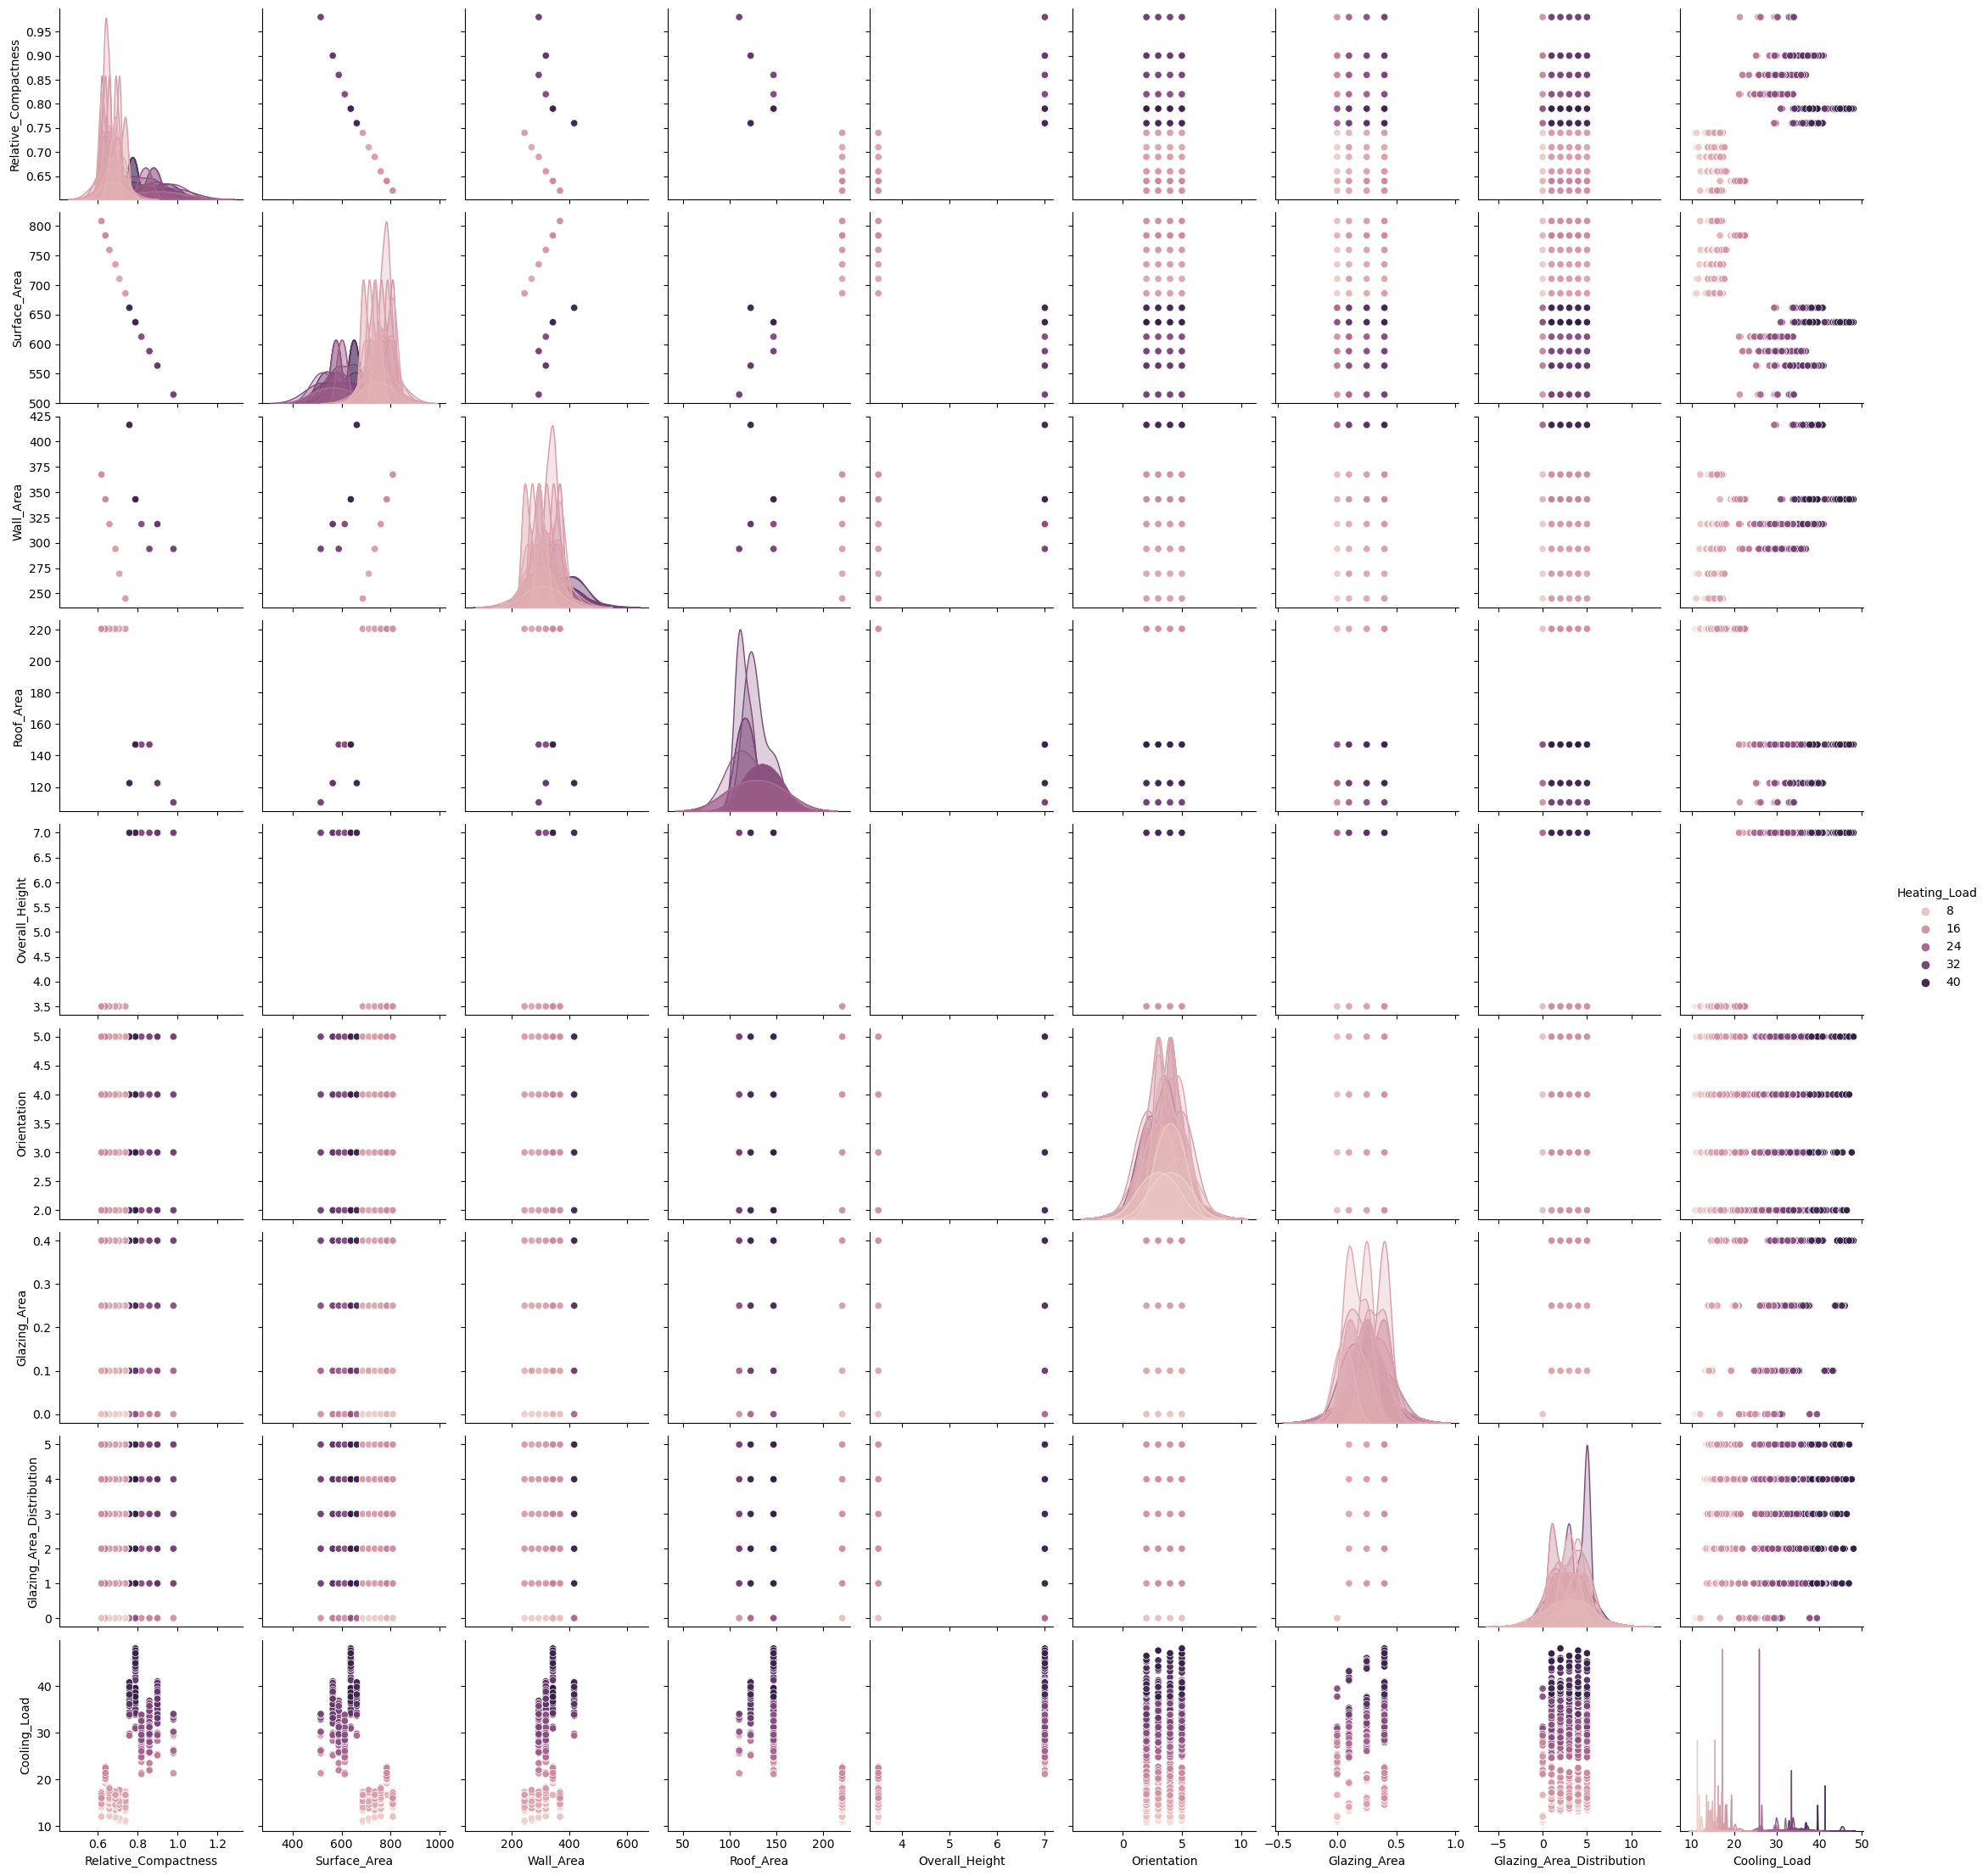

In [7]:
selected_features = ['Surface_Area', 'Glazing_Area', 'Overall_Height', 'Cooling_Load', 'Heating_Load']
subset_df = df[selected_features]

sns.pairplot(df, hue='Heating_Load')
plt.show()

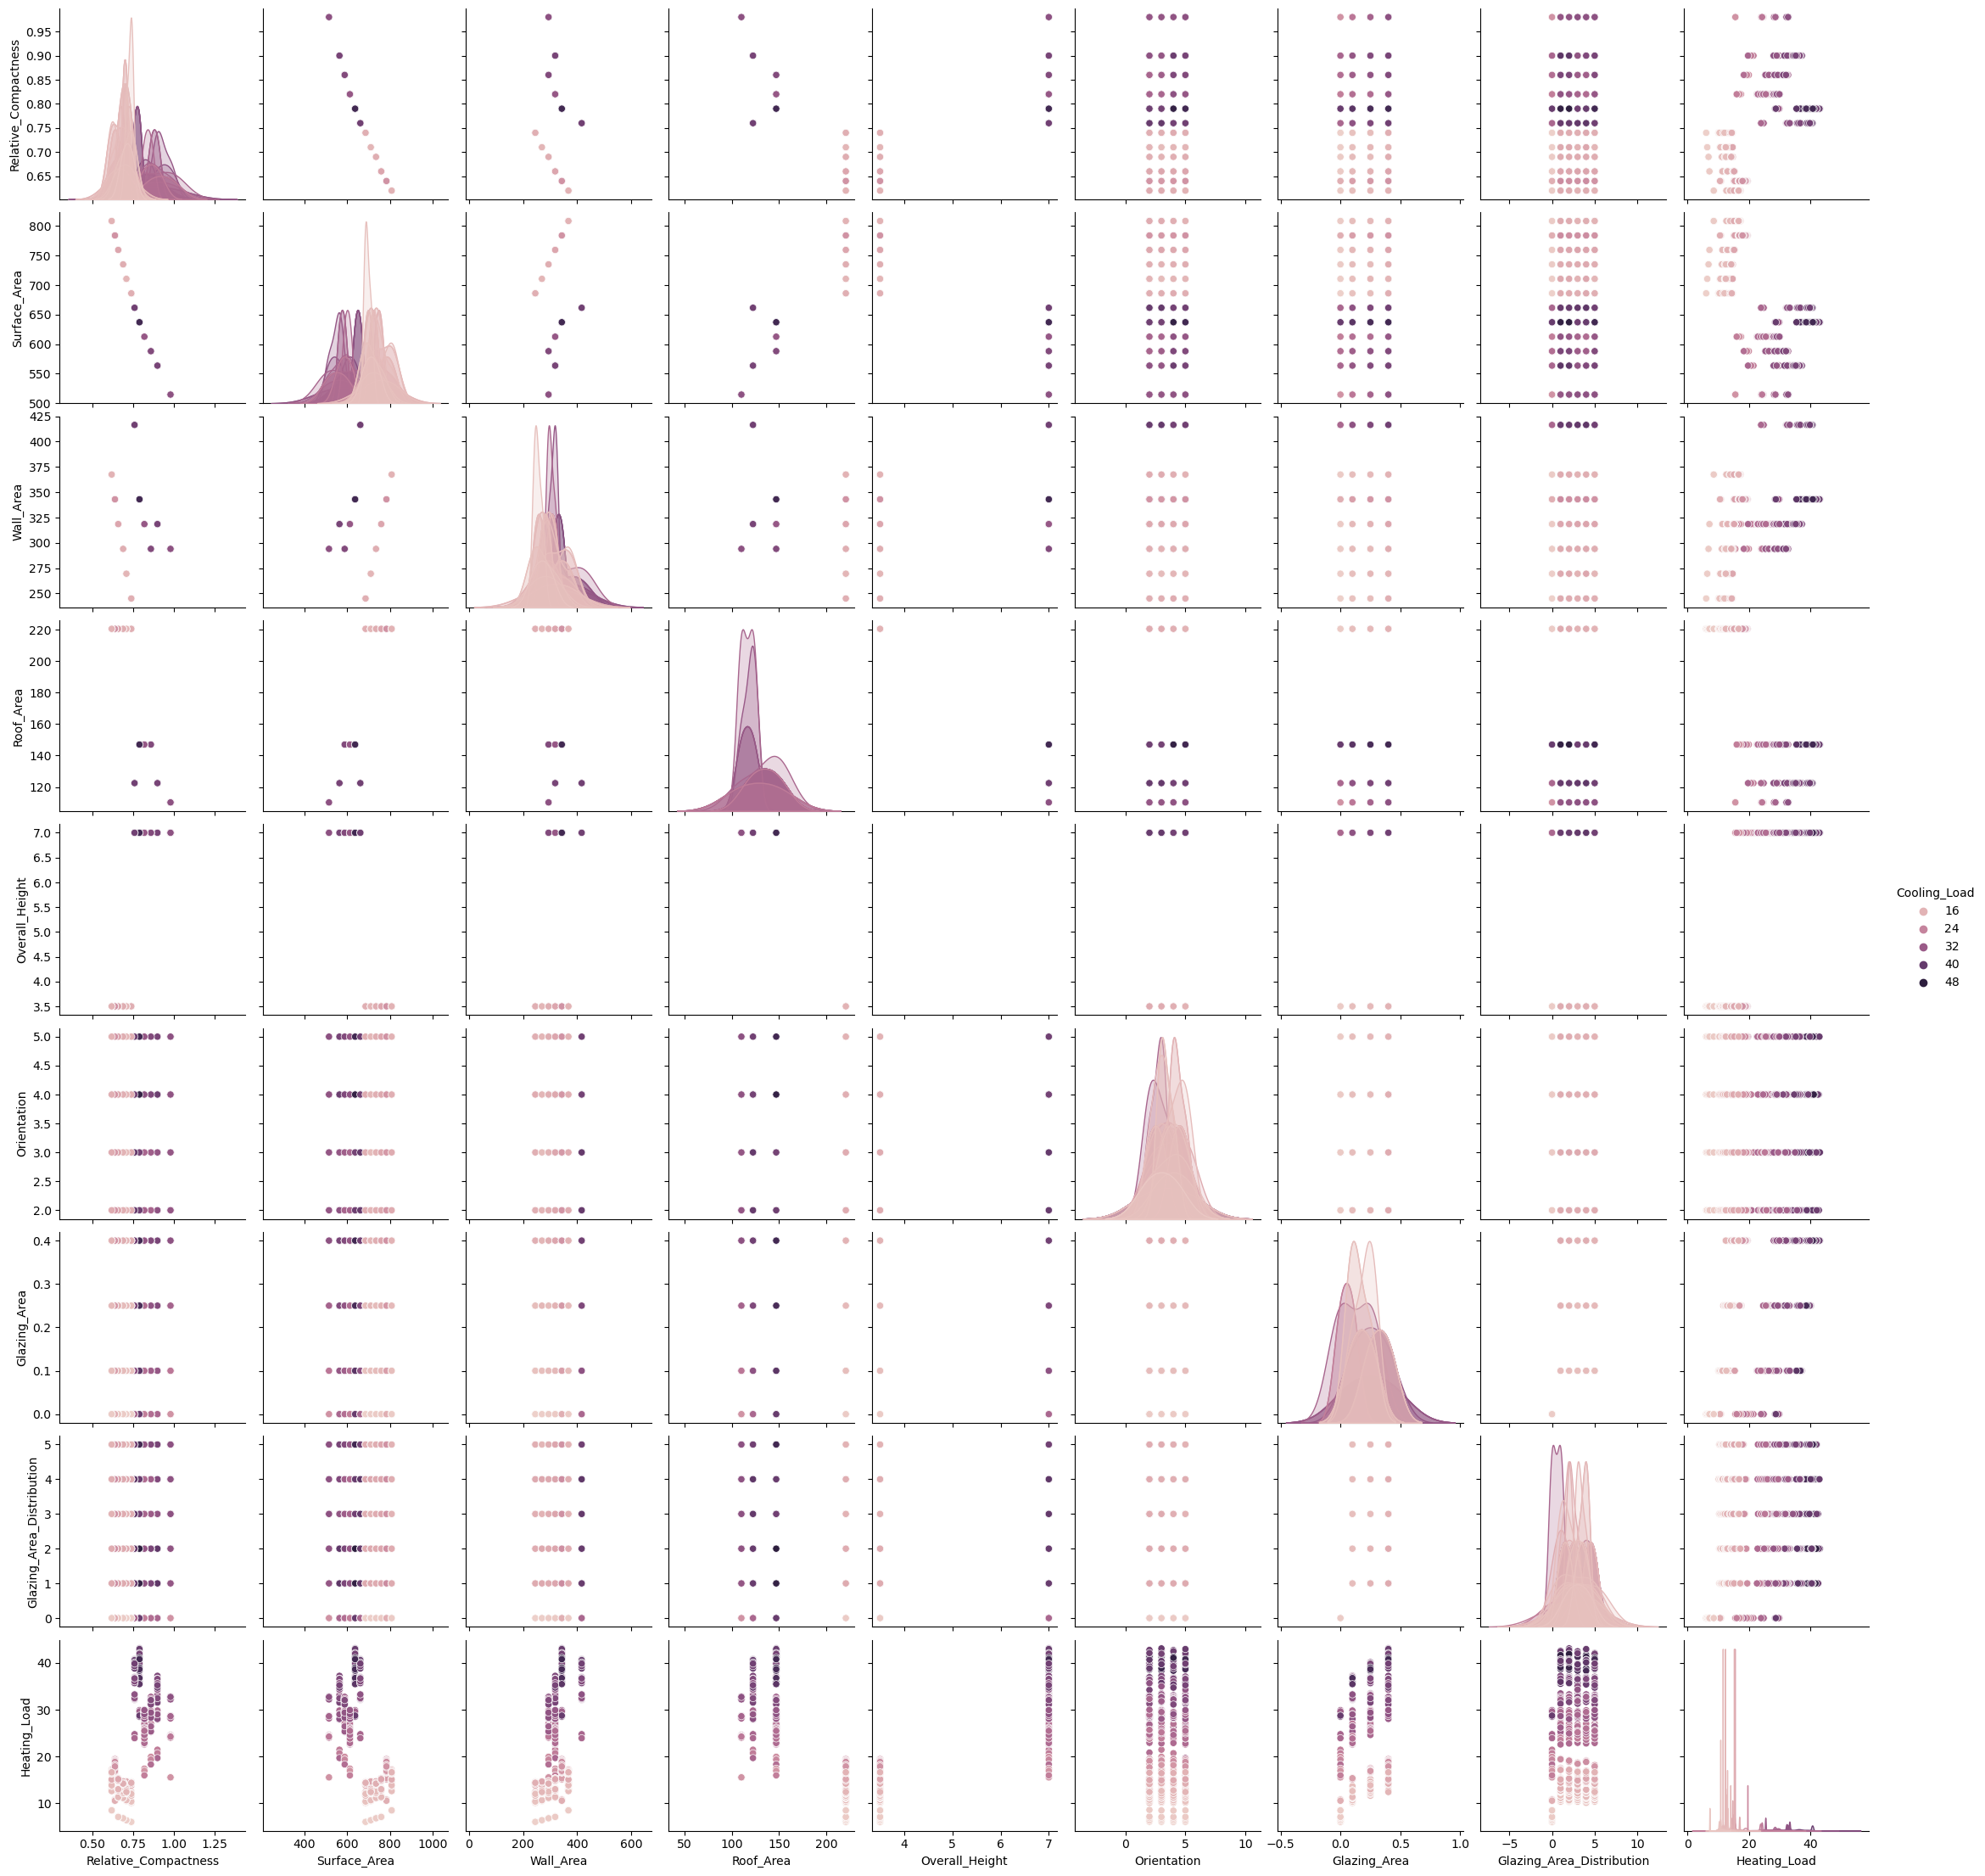

In [8]:
sns.pairplot(df, hue='Cooling_Load')
plt.show()

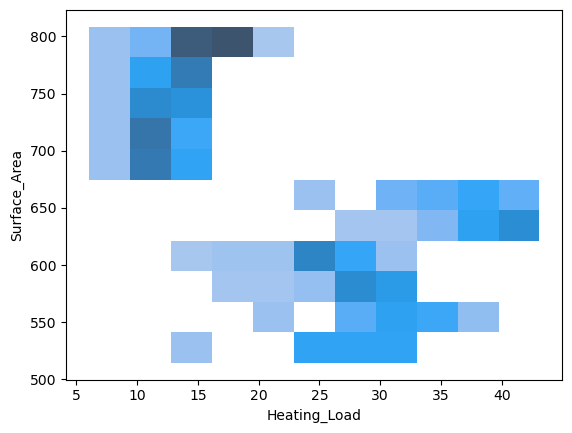

In [9]:
sns.histplot(subset_df, x=subset_df['Heating_Load'],y=subset_df['Surface_Area'])
plt.show()

In [10]:
#sns.pairplot(df, hue=df["Cooling_Load"])
#sns.pairplot(df, hue='Cooling_Load', markers=["o", "s"], kind='scatter')
corr_matrix = df.corr()


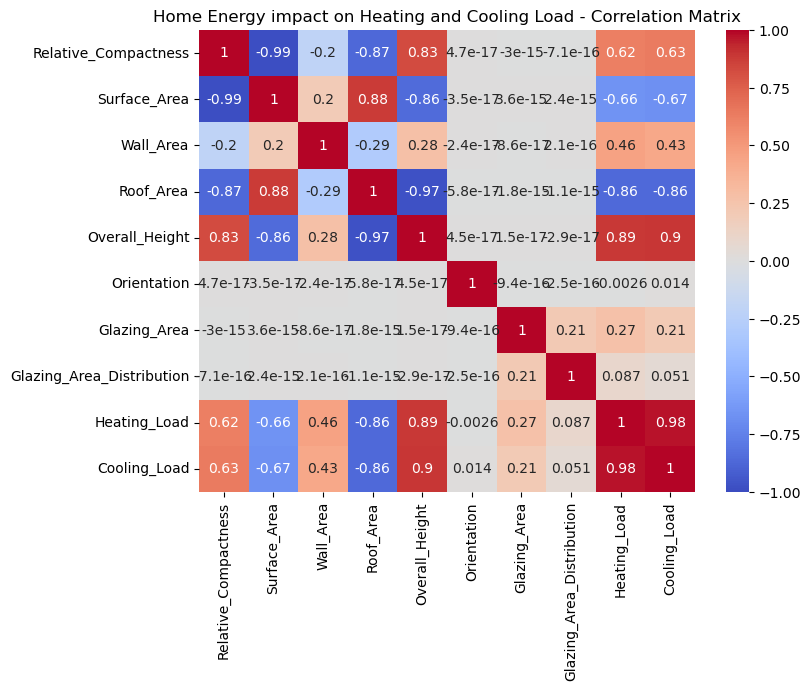

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Home Energy impact on Heating and Cooling Load - Correlation Matrix')
plt.show()

In [12]:
print(corr_matrix)

                           Relative_Compactness  Surface_Area     Wall_Area  \
Relative_Compactness               1.000000e+00 -9.919015e-01 -2.037817e-01   
Surface_Area                      -9.919015e-01  1.000000e+00  1.955016e-01   
Wall_Area                         -2.037817e-01  1.955016e-01  1.000000e+00   
Roof_Area                         -8.688234e-01  8.807195e-01 -2.923165e-01   
Overall_Height                     8.277473e-01 -8.581477e-01  2.809757e-01   
Orientation                        4.678592e-17 -3.459372e-17 -2.429499e-17   
Glazing_Area                      -2.960552e-15  3.636925e-15 -8.567455e-17   
Glazing_Area_Distribution         -7.107006e-16  2.438409e-15  2.067384e-16   
Heating_Load                       6.222722e-01 -6.581202e-01  4.556712e-01   
Cooling_Load                       6.343391e-01 -6.729989e-01  4.271170e-01   

                              Roof_Area  Overall_Height   Orientation  \
Relative_Compactness      -8.688234e-01    8.277473e-01  

In [13]:

# Assuming df is your DataFrame
#df = pd.DataFrame(data)  # Replace with your actual data

# Drop highly correlated features
df_reduced = df.drop(columns=['Surface_Area', 'Roof_Area'])  # Example of dropping highly correlated features

# Prepare the data
X = df_reduced.drop(columns=['Heating_Load', 'Cooling_Load'])
y_heating = df_reduced['Heating_Load']
y_cooling = df_reduced['Cooling_Load']

# Split the data
X_train, X_test, y_train_heating, y_test_heating = train_test_split(X, y_heating, test_size=0.2, random_state=42)
X_train, X_test, y_train_cooling, y_test_cooling = train_test_split(X, y_cooling, test_size=0.2, random_state=42)

# Random Forest Model for Heating Load
rf_heating = RandomForestRegressor(n_estimators=100, random_state=42)
rf_heating.fit(X_train, y_train_heating)
y_pred_heating_rf = rf_heating.predict(X_test)

# Evaluate the model
print("Heating Load (RF) - R2 Score:", r2_score(y_test_heating, y_pred_heating_rf))
print("Heating Load (RF) - MSE:", mean_squared_error(y_test_heating, y_pred_heating_rf))

# Random Forest Model for Cooling Load
rf_cooling = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cooling.fit(X_train, y_train_cooling)
y_pred_cooling_rf = rf_cooling.predict(X_test)

# Evaluate the model
print("Cooling Load (RF) - R2 Score:", r2_score(y_test_cooling, y_pred_cooling_rf))
print("Cooling Load (RF) - MSE:", mean_squared_error(y_test_cooling, y_pred_cooling_rf))

# Ridge Regression for comparison
ridge_heating = Ridge(alpha=1.0)
ridge_heating.fit(X_train, y_train_heating)
y_pred_heating_ridge = ridge_heating.predict(X_test)

print("Heating Load (Ridge) - R2 Score:", r2_score(y_test_heating, y_pred_heating_ridge))
print("Heating Load (Ridge) - MSE:", mean_squared_error(y_test_heating, y_pred_heating_ridge))

# Lasso Regression for comparison
lasso_heating = Lasso(alpha=0.1)
lasso_heating.fit(X_train, y_train_heating)
y_pred_heating_lasso = lasso_heating.predict(X_test)

print("Heating Load (Lasso) - R2 Score:", r2_score(y_test_heating, y_pred_heating_lasso))
print("Heating Load (Lasso) - MSE:", mean_squared_error(y_test_heating, y_pred_heating_lasso))

Heating Load (RF) - R2 Score: 0.9976865354614641
Heating Load (RF) - MSE: 0.24113599415584178
Cooling Load (RF) - R2 Score: 0.9685292912349089
Cooling Load (RF) - MSE: 2.915988916103898
Heating Load (Ridge) - R2 Score: 0.907187133528689
Heating Load (Ridge) - MSE: 9.674028909549403
Heating Load (Lasso) - R2 Score: 0.9028525686083936
Heating Load (Lasso) - MSE: 10.12582732870736


## What are we predicting? 

We will be predicting high Heating_Load and high cooling Cooling_Load, and determining the contributing factors. 

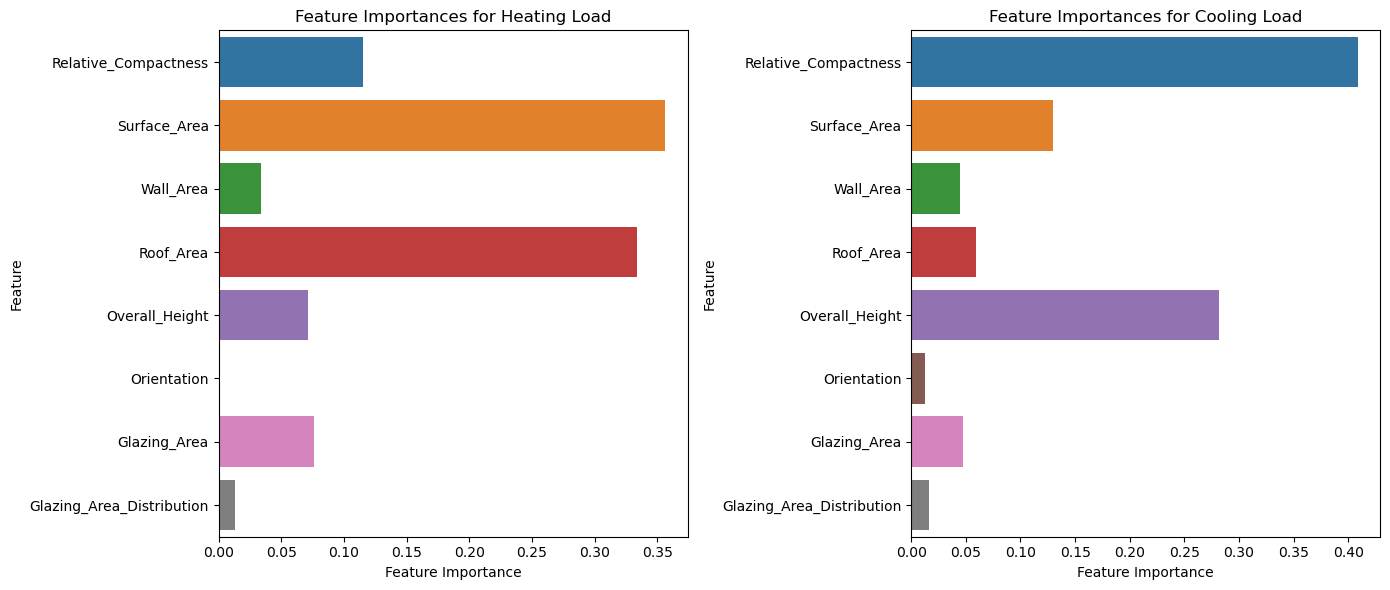

In [14]:
X = df.drop(columns=['Heating_Load', 'Cooling_Load'])
y_heating = df['Heating_Load']
y_cooling = df['Cooling_Load']

# Random Forest Model for Heating Load
rf_heating = RandomForestRegressor(n_estimators=100, random_state=42)
rf_heating.fit(X, y_heating)

# Random Forest Model for Cooling Load
rf_cooling = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cooling.fit(X, y_cooling)

# Extract feature importances
feature_importances_heating = pd.Series(rf_heating.feature_importances_, index=X.columns)
feature_importances_cooling = pd.Series(rf_cooling.feature_importances_, index=X.columns)

# Plot feature importances
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=feature_importances_heating, y=feature_importances_heating.index)
plt.title('Feature Importances for Heating Load')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

plt.subplot(1, 2, 2)
sns.barplot(x=feature_importances_cooling, y=feature_importances_cooling.index)
plt.title('Feature Importances for Cooling Load')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()